In [1]:
%R1 G2 B3
function final_image = model22(image)
    [m , n, d] = size(image);
    final_image = zeros(m*2, n*2);
    R = 0.3  * image(:, :, 1);
    G = 0.59 * image(:, :, 2);
    B = 0.11 * image(:, :, 3);
    I = R + G + B;
    for j = 1:m
        for i = 1:n
            k = i * 2 - 1;
            l = j * 2 - 1;
            final_image(l:l+1, k:k+1) = [I(j , i) image(j, i, 1); image(j, i, 2) image(j, i, 3);];
        endfor
    endfor
    

endfunction


/usr/local/lib/python3.9/site-packages/sos_notebook/kernel.py:1334: DeprecationWarning: Kernel._parent_header is deprecated in ipykernel 6. Use .get_parent()
  msg['msg_id'] = self._parent_header['header']['msg_id']


In [2]:
function final_image = imodel22(image)
    [m , n] = size(image);
    final_image = zeros(m/2, n/2, 3);
    for j = 1:m/2
        for i = 1:n/2
            k = i * 2 - 1;
            l = j * 2 - 1;
            kernel = image(l:l+1, k:k+1);
            final_image(j, i, 1) = kernel(1,2);
            final_image(j, i, 2) = kernel(2,1);
            final_image(j, i, 3) = kernel(2,2);
        endfor
    endfor
endfunction

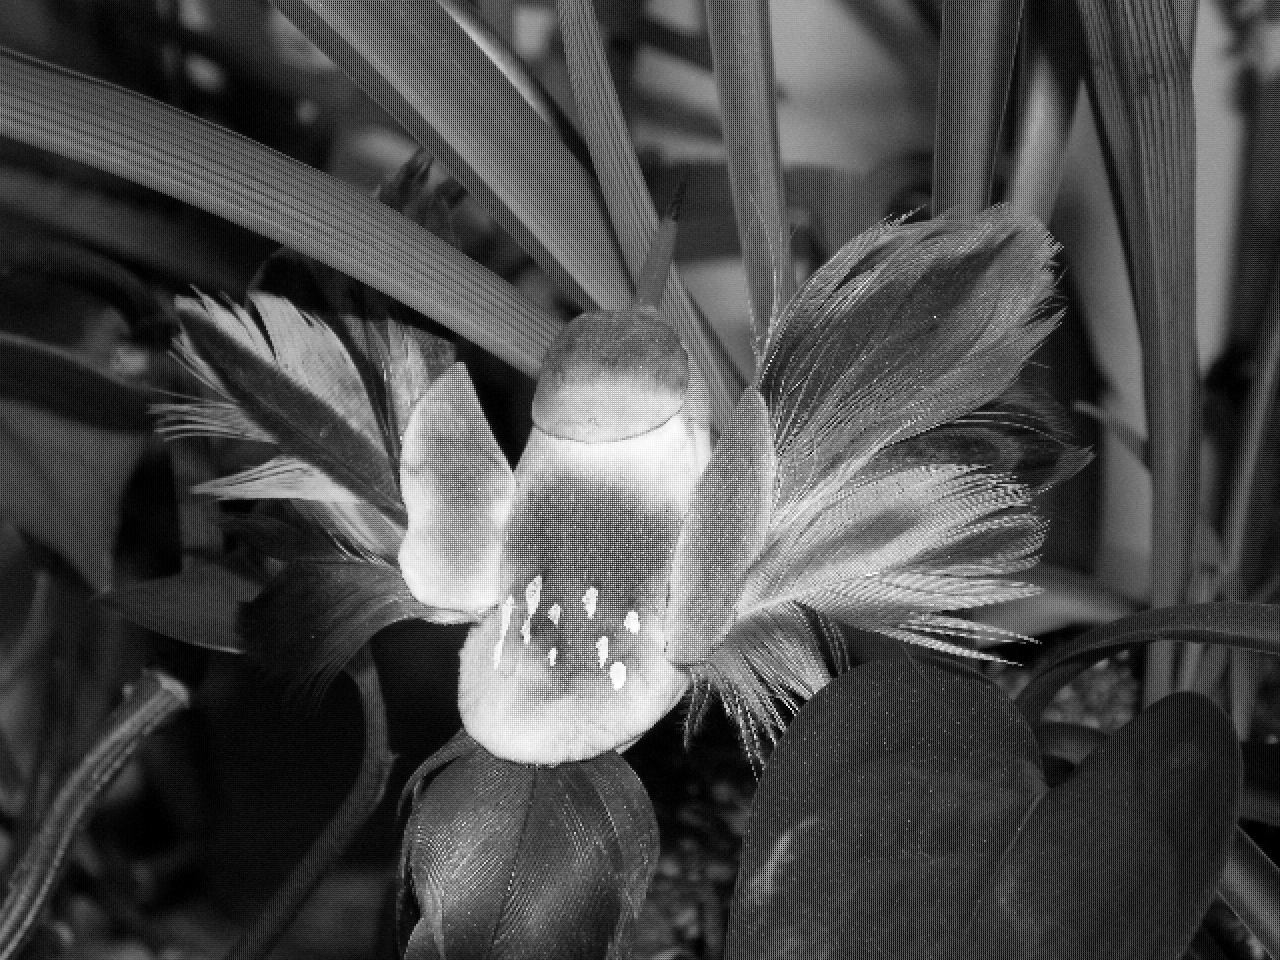

In [3]:
pkg load image;

A = imread("test.tif");
A = double(A);
r = model22(A);
imshow(uint8(r));

In [4]:
function final_image = model23(image)
    [m , n, d] = size(image);
    final_image = zeros(m*2, round((n*3)/2));
    for j = 1:m
        for i = 1:2:n-1
            k = i*3/2 - 1/2;
            l = j * 2 - 1;
            final_image(l:l+1, k:k+2) = [image(j, i, 1) image(j, i, 2) image(j, i + 1, 3); image(j, i, 3) image(j, i + 1, 1) image(j, i + 1, 2);];
        endfor
    endfor
endfunction

In [5]:
function final_image = imodel23(image)
    [m , n, d] = size(image);
    final_image = zeros(m/2, n/(3/2) + 1, 3);
    for j = 1:m/2
        for i = 1:2:((n/(3/2)))
            k = i * 3/2 - 1/2;
            l = j * 2 - 1;
            kernel = image(l:l+1, k:k+2);
            
            
            final_image(j, i, 1) = kernel(1, 1);
            final_image(j, i, 2) = kernel(1, 2);
            final_image(j, i, 3) = kernel(2, 1);
            
            final_image(j, i + 1, 1) = kernel(2, 2);
            final_image(j, i + 1, 2) = kernel(2, 3);
            final_image(j, i + 1, 3) = kernel(1, 3);
            
        endfor
    endfor
endfunction

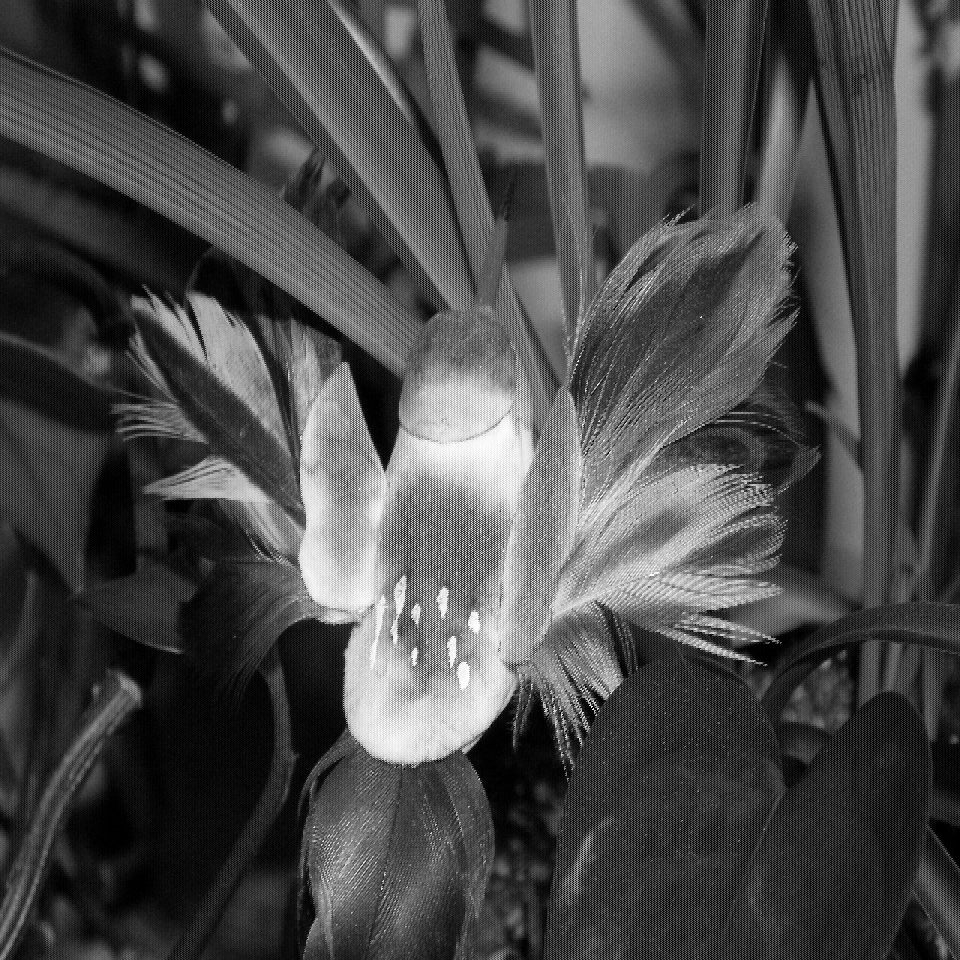

In [6]:
pkg load image;

A = imread("test.tif");
A = double(A);
r = model23(A);
imshow(uint8(r));

In [7]:
function final_image = modelrow(image)
    [m , n, d] = size(image);
    final_image = zeros(m*4, n);
    R = 0.3  * image(:, :, 1);
    G = 0.59 * image(:, :, 2);
    B = 0.11 * image(:, :, 3);
    I = R + G + B;
    for j = 1:m
        for i = 1:n
            l = j * 4 - 3;
            final_image(l:l+3, i) = [I(j , i); image(j, i, 1); image(j, i, 2); image(j, i, 3);];
        endfor
    endfor
    

endfunction

In [8]:
function final_image = imodelrow(image)
    [m , n, d] = size(image);
    final_image = zeros(m/4, n, 3);
    for j = 1:m/4
        for i = 1:n
            l = j * 4 - 3;
            
            kernel = image(l:l+3, i);
            final_image(j, i, 1) = kernel(2,1);
            final_image(j, i, 2) = kernel(3,1);
            final_image(j, i, 3) = kernel(4,1);
        endfor
    endfor
    

endfunction

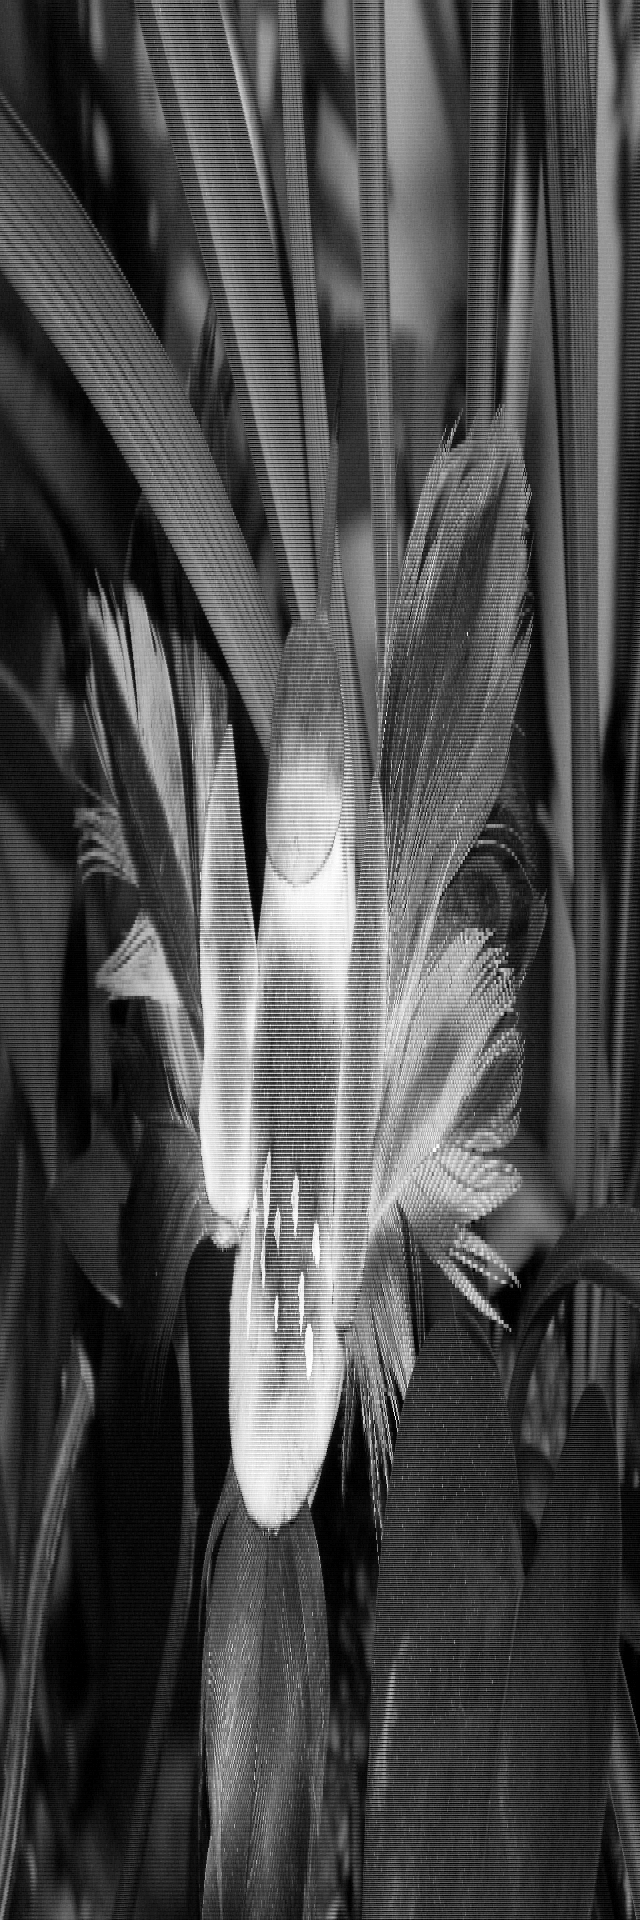

In [9]:
pkg load image;

A = imread("test.tif");
A = double(A);
r = modelrow(A);
imshow(uint8(r));

In [10]:
function final_image = modelcolumn(image)
    [m , n, d] = size(image);
    final_image = zeros(m, n*4);
    R = 0.3  * image(:, :, 1);
    G = 0.59 * image(:, :, 2);
    B = 0.11 * image(:, :, 3);
    I = R + G + B;
    for j = 1:m
        for i = 1:n
            k = i * 4 - 3;
            final_image(j, k:k+3) = [I(j , i) image(j, i, 1) image(j, i, 2) image(j, i, 3);];
        endfor
    endfor
    

endfunction

In [11]:
function final_image = imodelcolumn(image)
    [m , n, d] = size(image);
    final_image = zeros(m, n/4, 3);
    for j = 1:m
        for i = 1:n/4
            k = i * 4 - 3;
            kernel = image(j, k:k+3);
            final_image(j, i, 1) = kernel(1,2);
            final_image(j, i, 2) = kernel(1,3);
            final_image(j, i, 3) = kernel(1,4);
        endfor
    endfor
endfunction

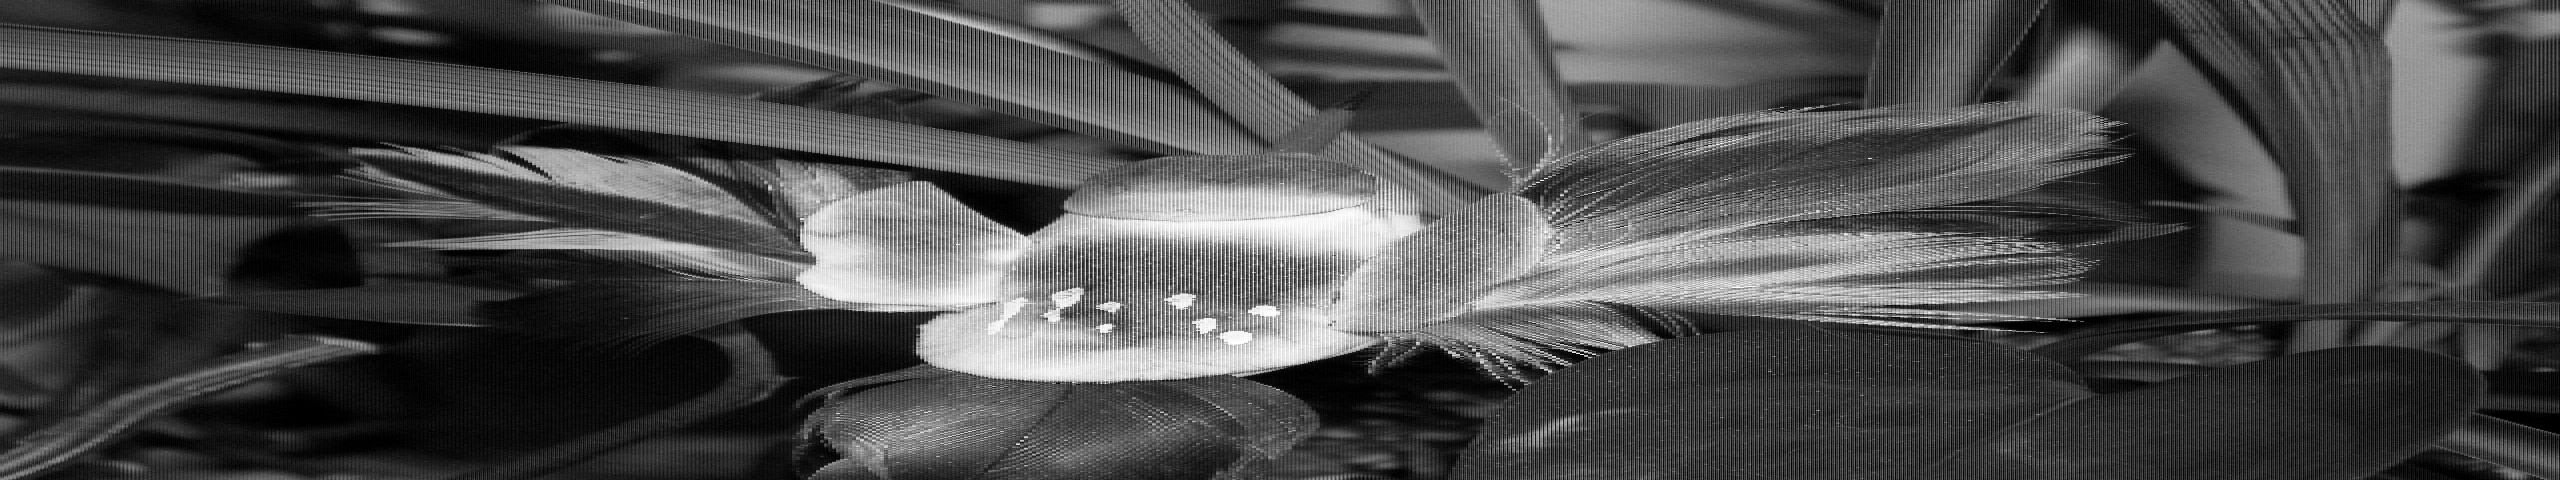

In [12]:
pkg load image;

A = imread("test.tif");
A = double(A);
r = modelcolumn(A);
imshow(uint8(r));

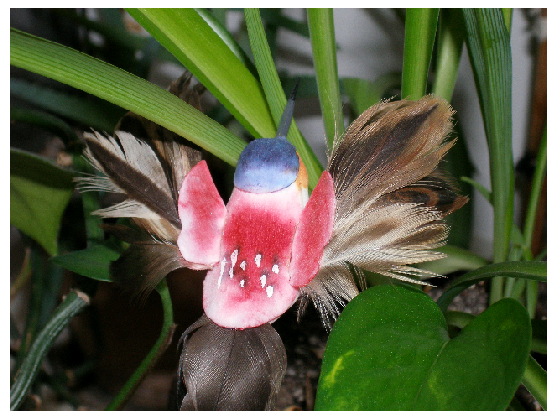

In [13]:
A = imread("test.tif");
A = double(A);
imshow(uint8(A));


In [77]:
function final_image = alpha_rooting(image, alpha)
    fft_image = fft2(image);
    magnitude = abs(fft_image) .^ alpha;
    angles = arg(fft_image);
    new_fft = magnitude .* exp(angles * 1i);
    final_image = abs(ifft2(new_fft));
    final_image = final_image*(255/max(max(final_image)));
endfunction

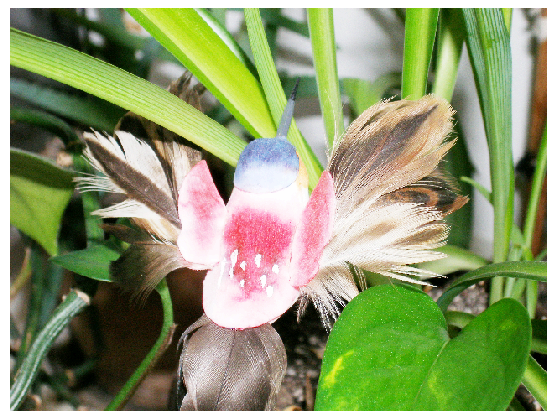

In [15]:
pkg load image;
A = imread("test.tif");
A = double(A);
r = modelrow(A);
B = histeq(r/255, 256);
%B = alpha_rooting(r, 1.011);
C = imodelrow(B);
imshow(uint8(C*255));

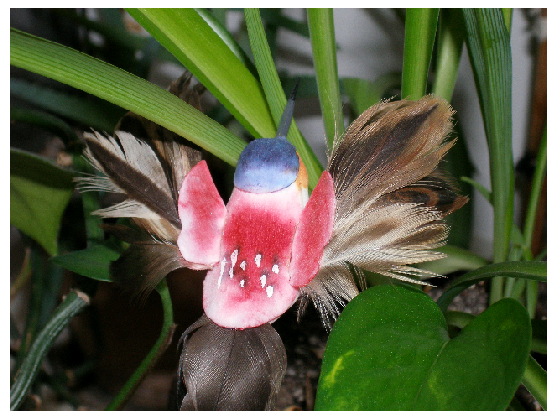

In [16]:
A = imread("test.tif");
A = double(A);
imshow(uint8(A));

In [17]:
function eme = EME(image, l1, l2)
    [m, n] = size(image);
    k1 = m/l1;
    k2 = n/l2;
    eme = 0;
    for i = 1:k1
        i_end = l1*i;
        i_start = i_end - (l1-1);
        for j = 1:k2
            j_end = l2*j;
            j_start = j_end - (l2-1);
            
            kernel = image(i_start:i_end, j_start:j_end);
            max_block = max(max(kernel));
            min_block = min(min(kernel));
            
            eme = eme + 20 * log10((max_block + 1)/(min_block + 1));
            
        endfor
    endfor
    eme = eme/(k1*k2);
endfunction

In [18]:
A = imread("test.tif");
A = double(A);
r = modelrow(A);
EME(A, 8, 8)
%B = histeq(r/255, 256);
%B = alpha_rooting(r, 1.011);
%C = imodelrow(B);
%imshow(uint8(C*255));

ans = 10.643


In [19]:
function ceme = CEME(image, l1, l2)
    [m, n, d] = size(image);
    k1 = floor(m/l1);
    k2 = floor(n/l2);
    ceme = 0;
    for i = 1:k1
        i_end = l1*i;
        i_start = i_end - (l1-1);
        for j = 1:k2
            j_end = l2*j;
            j_start = j_end - (l2-1);
            
            kernel = image(i_start:i_end, j_start:j_end, :);
            kernel_r_g_b = [kernel(:,:,1) kernel(:,:,2) kernel(:,:,3)];
            max_block = max(max(kernel_r_g_b));
            min_block = min(min(kernel_r_g_b));
            if (max_block == 0 || min_block == 0)
                if (max_block == 0)
                    ceme = ceme + 20 * log10(255);
                else
                    ceme = ceme + 20 * log10(max_block);
                endif
            
            
            else
                ceme = ceme + 20 * log10((max_block)/(min_block));
            endif
            
        endfor
    endfor
    ceme = ceme/(k1*k2);
endfunction

CEME_original = 11.193
EME_22 = 10.720
EME_hist = 15.966
EME_alpha = 15.589
CEME_alpha = 17.639
CEME_hist = 17.892


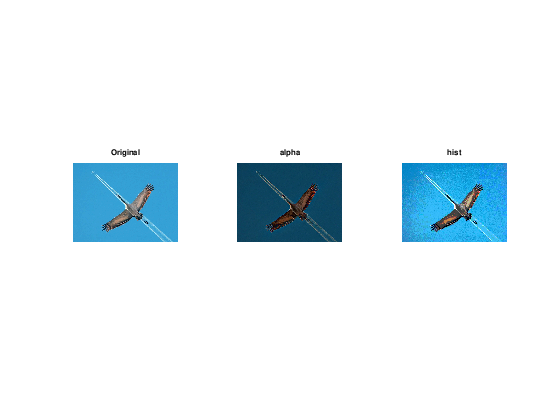

In [78]:
pkg load image;
A = imread("crane.jpeg");
A = double(A)/255;
r = model22(A);
CEME_original = CEME(A*255, 2, 2)
EME_22 = EME(r*255, 2, 2)
B1 = histeq(r, 256)*255;
EME_hist = EME(B1, 2, 2)
B = alpha_rooting(r, 0.88);
EME_alpha = EME(B, 2, 2)
C = imodel22(B);
C1 = imodel22(B1);
subplot (1, 3, 1)
imshow(uint8(A*255));
title("Original");
subplot (1, 3, 2)
imshow(uint8(C));
title("alpha");
subplot (1, 3, 3)
imshow(uint8(C1));
title("hist");
CEME_alpha = CEME(C, 2, 2)
CEME_hist = CEME(C1, 2, 2)

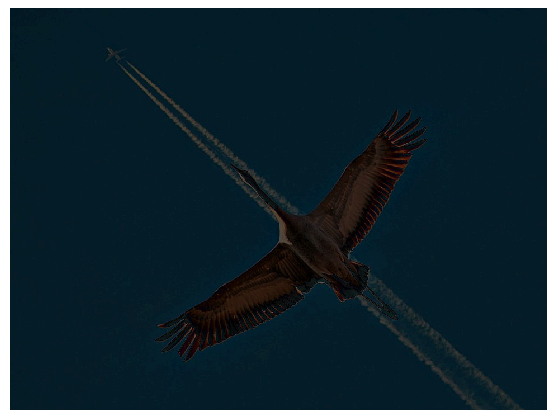

In [76]:
imshow(uint8(C*255))

CEME_original = 11.372
EME_23 = 10.893
EME_hist = 14.382
EME_alpha = 16.531
CEME_alpha = 18.706
CEME_hist = 16.658


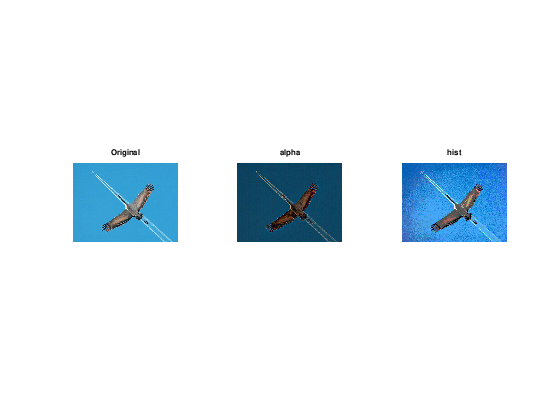

In [61]:
pkg load image;
A = imread("crane.jpeg");
A = double(A)/255;
r = model23(A);
CEME_original = CEME(A*255, 2, 3)
EME_23 = EME(r*255, 2, 3)
B1 = histeq(r, 256)*255;
EME_hist = EME(B1, 2, 3)
B = alpha_rooting(r, 0.88);
EME_alpha = EME(B, 2, 3)
C = imodel23(B);
C1 = imodel23(B1);
subplot (1, 3, 1)
imshow(uint8(A*255));
title("Original");
subplot (1, 3, 2)
imshow(uint8(C));
title("alpha");
subplot (1, 3, 3)
imshow(uint8(C1));
title("hist");
CEME_alpha = CEME(C, 2, 3)
CEME_hist = CEME(C1, 2, 3)

CEME_original = 11.335
EME_fila = 10.847
EME_hist = 15.966
EME_alpha = 15.966
CEME_alpha = 17.955
CEME_hist = 18.574


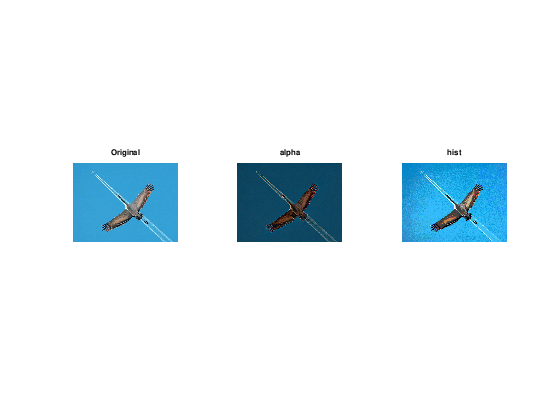

In [64]:
pkg load image;
A = imread("crane.jpeg");
A = double(A)/255;
r = modelrow(A);
CEME_original = CEME(A*255, 4, 1)
EME_fila = EME(r*2551, 4, 1)
B1 = histeq(r, 256)*255;
EME_hist = EME(B1, 4, 1)
B = alpha_rooting(r, 0.88);
EME_alpha = EME(B1, 4, 1)
C = imodelrow(B);
C1 = imodelrow(B1);
subplot (1, 3, 1)
imshow(uint8(A*255));
title("Original");
subplot (1, 3, 2)
imshow(uint8(C));
title("alpha");
subplot (1, 3, 3)
imshow(uint8(C1));
title("hist");
CEME_alpha = CEME(C, 4, 1)
CEME_hist = CEME(C1, 4, 1)

CEME_original = 11.309
EME_column = 10.720
EME_hist = 15.966
EME_alpha = 15.602
CEME_alpha = 17.915
CEME_hist = 18.475


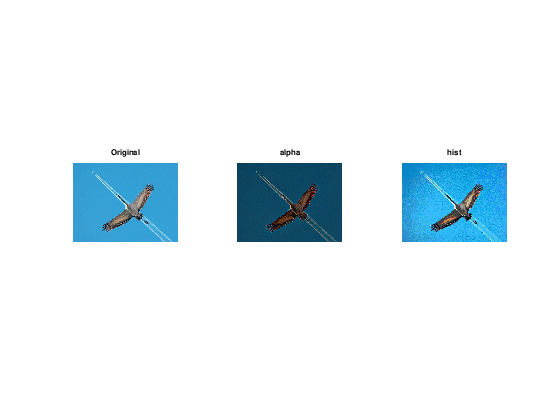

In [67]:
pkg load image;
A = imread("crane.jpeg");
A = double(A)/255;
r = modelcolumn(A);
CEME_original = CEME(A*255, 1, 4)
EME_column = EME(r*255, 1, 4)
B1 = histeq(r, 256)*255;
EME_hist = EME(B1, 1, 4)
B = alpha_rooting(r, 0.88);
EME_alpha = EME(B, 1, 4)
C = imodelcolumn(B);
C1 = imodelcolumn(B1);
subplot (1, 3, 1)
imshow(uint8(A*255));
title("Original");
subplot (1, 3, 2)
imshow(uint8(C));
title("alpha");
subplot (1, 3, 3)
imshow(uint8(C1));
title("hist");
CEME_alpha = CEME(C, 1, 4)
CEME_hist = CEME(C1, 1, 4)